In [9]:
import pandas as pd

covidDf = pd.read_csv("finalDataset")

covidDf['Date']= pd.to_datetime(covidDf['Date'])

# from Feb. 2020 till Oct. 2021 (11 @ 2020 + 10 @ 2021)
print("Date" , 'Cumulative_Cases' ,'Cumulative_tests', sep ='\t')
for i in range(2,23):
    print("**********")
    month = (i%13) + int(i/13) 
    year = 2020 + int(i/13)
    temp = covidDf.loc[[covidDf.index[(covidDf['Date'].dt.month == month) & \
                                      (covidDf['Date'].dt.year == year ) ].tolist()[-1]]]
        
    print( temp['Date'].iloc[0].strftime('%Y-%m-%d') , temp['Cumulative_Cases'].iloc[0]\
          ,temp['Cumulative_tests'].iloc[0],sep="\t")

Date	Cumulative_Cases	Cumulative_tests
**********
2020-02-29	1	0
**********
2020-03-31	781	22349
**********
2020-04-30	13409	94500
**********
2020-05-31	56910	222069
**********
2020-06-30	96088	356832
**********
2020-07-31	110695	495377
**********
2020-08-31	118778	629831
**********
2020-09-30	125760	775914
**********
2020-10-31	132556	975530
**********
2020-11-30	138833	1112430
**********
2020-12-31	143834	1241406
**********
2021-01-31	151335	1388419
**********
2021-02-28	163664	1537958
**********
2021-03-31	179964	1734601
**********
2021-04-30	205652	1903912
**********
2021-05-31	217458	2024606
**********
2021-06-30	222071	2165723
**********
2021-07-31	226239	2332220
**********
2021-08-31	232744	2504644
**********
2021-09-30	236643	2665646
**********
2021-10-27	238845	2809592


In [10]:
filteredDf=covidDf[(covidDf['Date']>='2/29/2020')&(covidDf['Date']<='12/31/2020')]
filteredDf

,Unnamed: 0,Date,Cases_perDay,Cumulative_Cases,Tests_perDay,Cumulative_tests,Cumulative_cases_under_treatment,Recovered_perDay,Cumulative_recovered_cases,Deaths_perDay,Cumulative_deaths,Vaccines_perDay,Cumulative_vaccines_administered
0,0,2020-02-29,1,1,0,0,1,0,0,0,0,NaN,NaN
1,1,2020-03-01,2,3,0,0,3,0,0,0,0,NaN,NaN
2,2,2020-03-02,4,7,0,0,7,0,0,0,0,NaN,NaN
3,3,2020-03-03,1,8,0,0,8,0,0,0,0,NaN,NaN
4,4,2020-03-04,0,8,0,0,8,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,302,2020-12-27,159,143062,9465,1223497,1952,179,140866,0,244,NaN,NaN
303,303,2020-12-28,160,143222,8401,1227488,1963,149,141015,0,244,NaN,NaN
304,304,2020-12-29,206,143428,9292,1231890,2036,132,141147,1,245,NaN,NaN
305,305,2020-12-30,193,143621,8893,1236193,2076,153,141300,0,245,NaN,NaN


Text(0, 0.5, 'Cases')

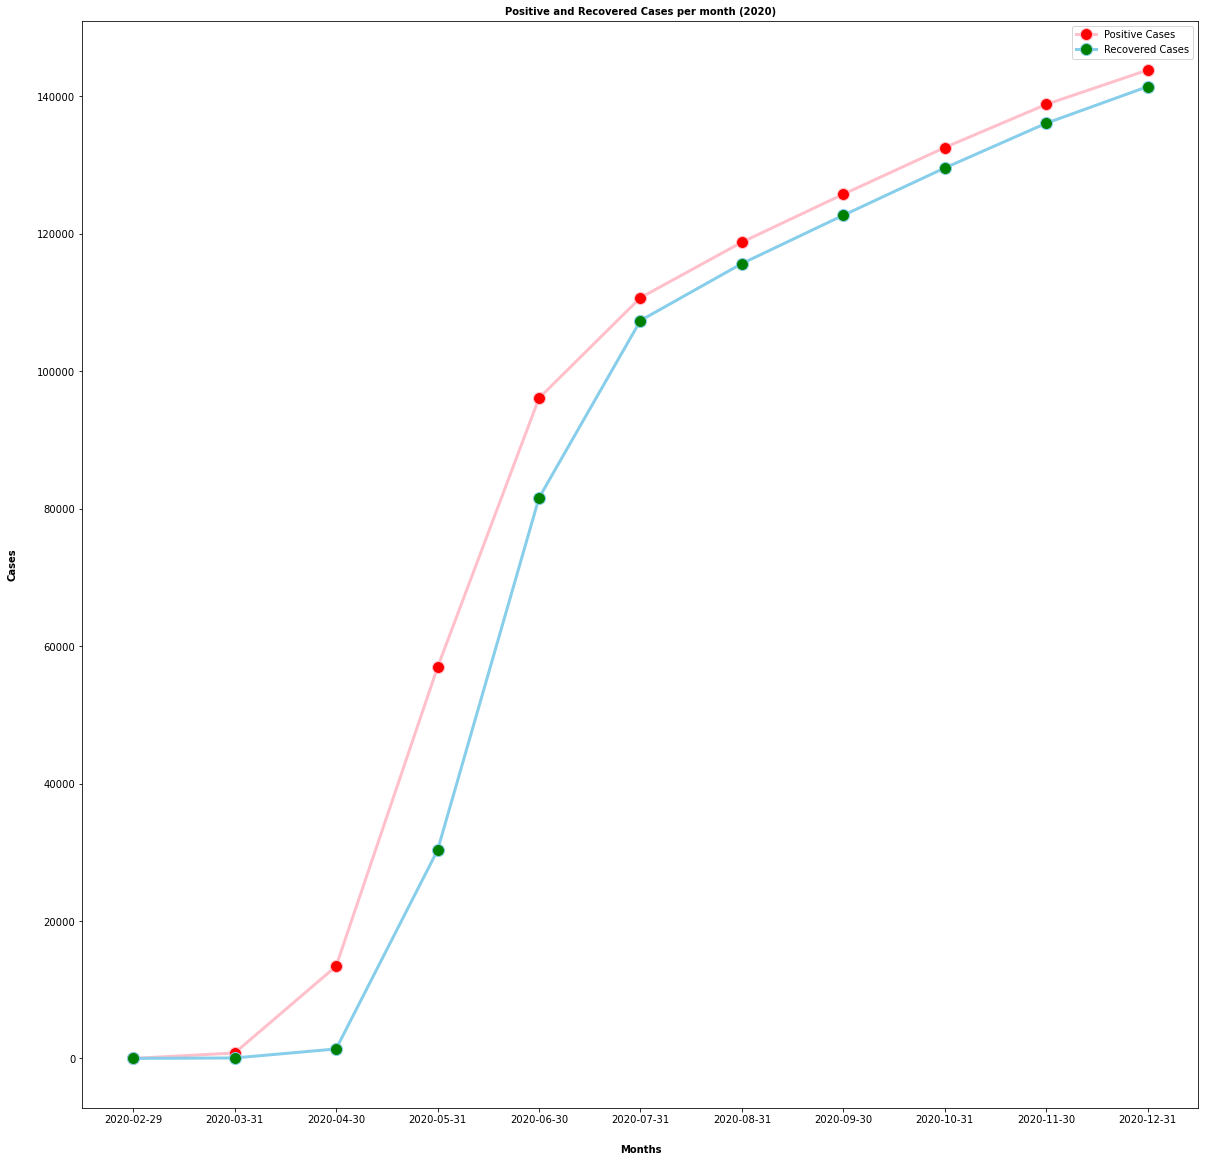

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

covidDf = pd.read_excel("finalDataset_test.xlsx")

covidDf['Date']= pd.to_datetime(covidDf['Date'])

qatarDf = pd.DataFrame(columns = ["Date","Cumulative_Cases" , "Cumulative_recovered_cases" ])

# from Feb. 2020 till Oct. 2021 (11 @ 2020 + 10 @ 2021)
for i in range(2,23):
    month = (i%13) + int(i/13) 
    year = 2020 + int(i/13)
    temp = covidDf.loc[[covidDf.index[(covidDf['Date'].dt.month == month) & \
                                      (covidDf['Date'].dt.year == year ) ].tolist()[-1]]]
    
    qatarDf.loc[qatarDf.shape[0]]  = [temp['Date'].iloc[0].strftime('%Y-%m-%d')
                                      , temp['Cumulative_Cases'].iloc[0]\
                                      ,temp['Cumulative_recovered_cases'].iloc[0] ] 
        
 

 # add permont cases/ test
qatarDf['perMonth_Cases'] = [qatarDf['Cumulative_Cases'].iloc[0] , *np.diff( qatarDf['Cumulative_Cases'] ).tolist()]
qatarDf['perMonth_recovered'] = [qatarDf['Cumulative_recovered_cases'].iloc[0] , *np.diff( qatarDf['Cumulative_recovered_cases'] ).tolist()]

# using only 2020 data
filteredDf=qatarDf[(qatarDf['Date']>='2020-02-29')&(qatarDf['Date']<='2020-12-31')]
filteredDf

fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(20)
ax.plot(filteredDf["Date"],filteredDf["Cumulative_Cases"],label="Positive Cases", marker='o', markerfacecolor='red', markersize=12, color='pink', linewidth=3)
ax.plot(filteredDf["Date"],filteredDf["Cumulative_recovered_cases"],label="Recovered Cases", marker='o', markerfacecolor='green', markersize=12, color='skyblue', linewidth=3)

# show legend
plt.legend()

plt.title("Cumulative Positive and Recovered Cases (2020)", weight='bold',size=10)
plt.xlabel("Months",labelpad=20, weight='bold', size=10)
plt.ylabel("Cases",labelpad=20, weight='bold', size=10)

          Date  Cumulative_Cases Cumulative_recovered_cases  perMonth_Cases  \
0   2020-02-29               1.0                          0             1.0   
1   2020-03-31             781.0                         62           780.0   
2   2020-04-30           13409.0                       1372         12628.0   
3   2020-05-31           56910.0                      30290         43501.0   
4   2020-06-30           96088.0                      81564         39178.0   
5   2020-07-31          110695.0                     107377         14607.0   
6   2020-08-31          118778.0                     115667          8083.0   
7   2020-09-30          125760.0                     122699          6982.0   
8   2020-10-31          132556.0                     129583          6796.0   
9   2020-11-30          138833.0                     136090          6277.0   
10  2020-12-31          143834.0                     141422          5001.0   
11  2021-01-31          151335.0                    

Text(0, 0.5, 'Recovered cases')

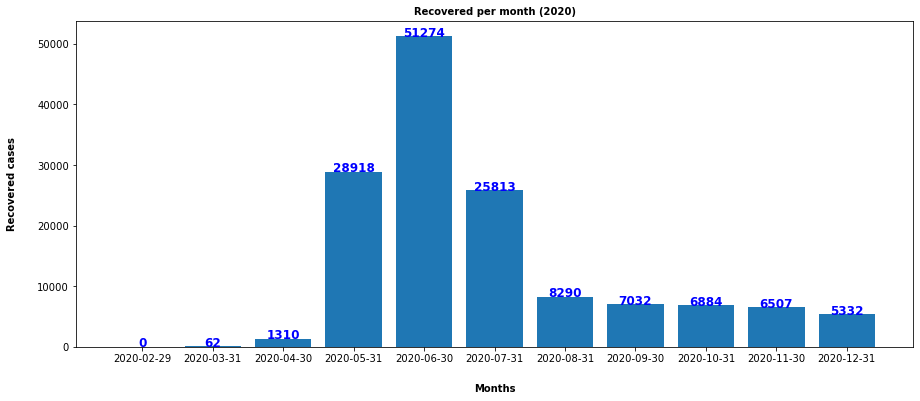

In [40]:
import pandas as pd
import numpy as np

covidDf = pd.read_excel("finalDataset_test.xlsx")

covidDf['Date']= pd.to_datetime(covidDf['Date'])

qatarDf = pd.DataFrame(columns = ["Date","Cumulative_Cases" , "Cumulative_recovered_cases" ])

# from Feb. 2020 till Oct. 2021 (11 @ 2020 + 10 @ 2021)
for i in range(2,23):
    month = (i%13) + int(i/13) 
    year = 2020 + int(i/13)
    temp = covidDf.loc[[covidDf.index[(covidDf['Date'].dt.month == month) & \
                                      (covidDf['Date'].dt.year == year ) ].tolist()[-1]]]
    
    qatarDf.loc[qatarDf.shape[0]]  = [temp['Date'].iloc[0].strftime('%Y-%m-%d')
                                      , temp['Cumulative_Cases'].iloc[0]\
                                      ,temp['Cumulative_recovered_cases'].iloc[0] ] 
        
 

 # add permont cases/ test
qatarDf['perMonth_Cases'] = [qatarDf['Cumulative_Cases'].iloc[0] , *np.diff( qatarDf['Cumulative_Cases'] ).tolist()]
qatarDf['perMonth_recovered'] = [qatarDf['Cumulative_recovered_cases'].iloc[0] , *np.diff( qatarDf['Cumulative_recovered_cases'] ).tolist()]

print(qatarDf)

filteredDf=qatarDf[(qatarDf['Date']>='2020-02-29')&(qatarDf['Date']<='2020-12-31')]
filteredDf
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)
ax.bar(filteredDf["Date"],filteredDf["perMonth_recovered"])
for i, v in enumerate(filteredDf["perMonth_recovered"].values):
    ax.text(i, v, s = ("%.0f" % v), color='blue',fontweight='bold', fontsize = 12, ha='center')
plt.title("Recovered per month (2020)", weight='bold',size=10)
plt.xlabel("Months",labelpad=20, weight='bold', size=10)
plt.ylabel("Recovered cases",labelpad=20, weight='bold', size=10)

          Date  Cumulative_Cases Cumulative_recovered_cases  perMonth_Cases  \
0   2020-02-29               1.0                          0             1.0   
1   2020-03-31             781.0                         62           780.0   
2   2020-04-30           13409.0                       1372         12628.0   
3   2020-05-31           56910.0                      30290         43501.0   
4   2020-06-30           96088.0                      81564         39178.0   
5   2020-07-31          110695.0                     107377         14607.0   
6   2020-08-31          118778.0                     115667          8083.0   
7   2020-09-30          125760.0                     122699          6982.0   
8   2020-10-31          132556.0                     129583          6796.0   
9   2020-11-30          138833.0                     136090          6277.0   
10  2020-12-31          143834.0                     141422          5001.0   
11  2021-01-31          151335.0                    

Text(0, 0.5, 'Positive Cases')

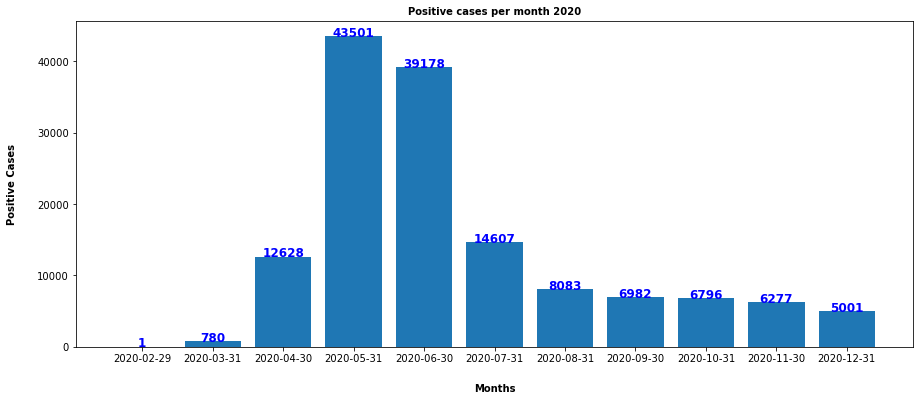

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
covidDf = pd.read_excel("finalDataset_test.xlsx")

covidDf['Date']= pd.to_datetime(covidDf['Date'])

qatarDf = pd.DataFrame(columns = ["Date","Cumulative_Cases" , "Cumulative_recovered_cases" ])

# from Feb. 2020 till Oct. 2021 (11 @ 2020 + 10 @ 2021)
for i in range(2,23):
    month = (i%13) + int(i/13) 
    year = 2020 + int(i/13)
    temp = covidDf.loc[[covidDf.index[(covidDf['Date'].dt.month == month) & \
                                      (covidDf['Date'].dt.year == year ) ].tolist()[-1]]]
    
    qatarDf.loc[qatarDf.shape[0]]  = [temp['Date'].iloc[0].strftime('%Y-%m-%d')
                                      , temp['Cumulative_Cases'].iloc[0]\
                                      ,temp['Cumulative_recovered_cases'].iloc[0] ] 
        
 

 # add permont cases/ test
qatarDf['perMonth_Cases'] = [qatarDf['Cumulative_Cases'].iloc[0] , *np.diff( qatarDf['Cumulative_Cases'] ).tolist()]
qatarDf['perMonth_recovered'] = [qatarDf['Cumulative_recovered_cases'].iloc[0] , *np.diff( qatarDf['Cumulative_recovered_cases'] ).tolist()]

print(qatarDf)

filteredDf=qatarDf[(qatarDf['Date']>='2020-02-29')&(qatarDf['Date']<='2020-12-31')]
filteredDf
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)
ax.bar(filteredDf["Date"],filteredDf["perMonth_Cases"])
plt.title("Positive cases per month 2020", weight='bold',size=10)
for i, v in enumerate(filteredDf["perMonth_Cases"].values):
    ax.text(i, v, s = ("%.0f" % v), color='blue',fontweight='bold', fontsize = 12, ha='center')
plt.xlabel("Months",labelpad=20, weight='bold', size=10)
plt.ylabel("Positive Cases",labelpad=20, weight='bold', size=10)